In [1]:
import ipywidgets as widgets
from ipywidgets import interact, IntSlider, FloatSlider

import numpy as np
%matplotlib inline 
import matplotlib.pyplot as plt

from numpy import pi, cos, sin, exp

%load_ext autoreload

%autoreload 2

from fourier_interactives import plot_sin_harmonic, sawtooth_interactive, sin_harmonic_interactive
from static_plots import mystery_harmonics, periodic_sawtooth, sawtooth_static_plot

# Fourier Analysis (First Steps - Fourier Series)
## Originally Fourier Analysis for Freshman 
### Joseph E. McEwen, (c) 2021

**user warning :** This is a first draft of a set of interacitve notes in python. Be warned, there are likely typos and mistakes and bugs. Proceed with caution. **If you see mistakes, make me aware of them**

**For students in physics 223 spring 2021 only. No permission granted for distribution or copying**

**This is a first version. It is a work in progress. Alert me to any errors.**

**students:** 
* For those that don't know Python, don't worry. Ignore the code. Pay attention to the text and diagrams. 
* This lab should take you 4-5 hours to complete. You will have 3 weeks to complete it. If you work 40 mintues a day you will have an enjoyable time and finish in a week. When you get stuck write down your confusion, move one and then ask the me or the group about your confusion. 
* This [video](https://www.youtube.com/watch?v=r6sGWTCMz2k) is worth watching. 

**How did this notebook series get started?** It was requested! A few students in physics 223 requested lectures on Fourier analysis. They asked, I have to deliver. Can freshman learn Fourier analysis? I make the following points: 

* Students in physics 223 are typically taking differential equations or linear algebra. Fourier analysis can be taught with first term calculus. So, the math level is something the students in physics 223 are familiar with. In fact Stewart's calculus book (the standard freshman calculus book) has a supplemental section on [Fourier series](https://www.stewartcalculus.com/data/CALCULUS%206E/upfiles/topics/6e_at_01_fs_stu.pdf). If you need help with some of the integrals, you can check out the openstax review [here](https://openstax.org/books/calculus-volume-2/pages/3-2-trigonometric-integrals). Considering that students in physics 223 have completed their calculus sequence, the mathematics of Fourier analysis should not be anything that is not already within their mathematical knowldege. 

* A few introductory physics books include Fourier analysis. For example the book [Matter and Interactions, by Chabay and Sherwood](https://matterandinteractions.org/) includes Fourier series in their section on waves, which you can find [here](https://matterandinteractions.org/wp-content/uploads/2016/07/Supplement3-Waves.pdf). 

* Fourier analysis is taught at the begining of your sophmore year. Physics 223 students are at the end of the freshman year (or at the end of the sophmore year). Typically one does not take courses in the summer at this point in their academic career. We are not making a big jump teaching Fourier series in the waves & oscillations class, students will be learning this subject in a few months anyway (without any itermediate instruction). 

* The only reason it is typically taught at the sophmore level is historical. Another example of people just holding on to bad ideas from the past. 

* To the student, we are going to go slow and I will be walking you through a lot of calculations. Have no fear, don't let all the symbols intimidate you. The mathematics is not that difficult. I have written out more math than is usually need (so that you can see every step). 


**What is Fourier analysis?**

For me there are three aspects of Fourier analysis: the Fourier series, the Fourier transform, and the discrete Fourier transform (in particular the fast Fourier transform the FFT). We are mostly going to be concerned with the Fourier series in these lessons. The Fourier series is about representing a peridoic functions as linear combinations of sines and cosines (or exponentials). While, the Fourier tranform states that a general function (not necessarily periodic) can be represented as an integral of sines and cosines or exponentials. The discrete Fourier transform is the Fourier transfrom performed numerically on a comptuer. 

As a wonderful aside, you may like to watch this [video](https://www.youtube.com/watch?v=avSHHi9QCjA) of a discussion with the mathematical physicist Cornelius Lanczos. At ~24.20 in the video there is discussion about Fourier analysis, it applications, and its greatness (you really ought to here how Lanczos praises the Fourier series). There is also a lot of interesting talk about the relationhsip between math and physics and matrix algebra. Here is another [video](https://www.youtube.com/watch?v=PO6xtSxB5Vg&t=140s) with Lanczos. I have to say I really enjoy how clearly Lanczos speaks. I feel that this is a manner that I should try to replicate. 


**What is a Fourier series?**

A Fourier series says that a periodic function can be represented as a sum of simple cosine and sine functions. What! Yep, that is weird, but it is true. A Fourier series asserts that a periodic function $f(x)$ on the interval $0 \leq x \leq L$ can be written as so
\begin{align} 
f(x) = a_0 + \displaystyle \sum_{n=1}^\infty a_n \cos \left( \frac{2 \pi n x}{L} \right) + b_n \sin \left( \frac{2 \pi n x}{L}\right)  ~, 
\end{align} 
where $a_n$ and $b_n$ are constant coefficients. We will worry about how the $a_n$ and $b_n$ are determined shortly, but for now let us see a Fourier series in action. Let us consider the function of a line $y=Ax$, where $A$ is the slope. This function can be written as sum of sin terms $\sum_n b_n \sin(2\pi n x/L) = b_1 \sin(2 \pi x/L) + b_2 \sin( 4 \pi x/L) + b_3 \sin(6 \pi x/L) +~ ...$. In practice we don't compute the Fourier series to an infinite number of terms, we truncate the series at some desired $n$ value. Generally, the more terms we add the better the truncated Fourier series approximates the true function, but we might like to consult a mathematician in cases where we are unsure.  

**experiemnt 1**
Below is an interactive widget that plots the truncated Fourier seris for the function $y=Ax$. You can adjust the number of terms in the Fourier series and you can adjust the slope value $A$. Start off with $n=1$ so you can assure yourself that we are dealing with sine functions. Write down your observations. 

The $2\pi$ in the cosine and sine terms means that the $n=1$ terms will have a period of $L$. We can introduce the wave number $k_n=2\pi n/L$. The wave number $k_n$ is the number of full wavelngths that can fit in the interval $0$ to $L$. Using the wave number, the cosines and sine terms have arguments $k_n x$. 

**math-physics problem 1:** *Explain why the $n=1$ terms have a wavelength of $L$, the $n=2$ terms have a wavelength of $L/2$, and what about the $n=3$ terms?It is helpful to view the interactive in cell number 4, the sine_harmonic_interactive.*

In [2]:
# have some fun with this interactive plot 
# plot shows the Fourier series representation of y(x)=Ax
# be sure to execute the cell by running it with triangle icon on the toolbar
sawtooth_interactive();

interactive(children=(IntSlider(value=10, description='n terms', min=1), FloatSlider(value=1.0, description='s…

**Periodicity and Gibb's phenomenon**

You might have noticed that although the Fourier series above resembles the function $y=Ax$ as $n$ is increased, a high frequency oscillation develops at the end points. This is called the [Gibb's phenomenon](https://en.wikipedia.org/wiki/Gibbs_phenomenon). The Gibb's phenomenon is due the the function $y=Ax$ being discountinous at the endpoints. Remember that the Fourier series assumes the function is periodic on the interval $0 \leq x \leq L$. That means we are assuming the function looks like the plot below, with infinite repeats of the function to the left and right (i.e., it is periodic to $\pm \infty$). We call this function a sawtooth function (cue [scary music](https://www.youtube.com/watch?v=AtGTot98UAo)). The sawtooth function is most certainly discontinous at the endpoints. We will talk about the Gibb's phenomenon more in a more advanced notebook, but probably not for the physics 223 class. 

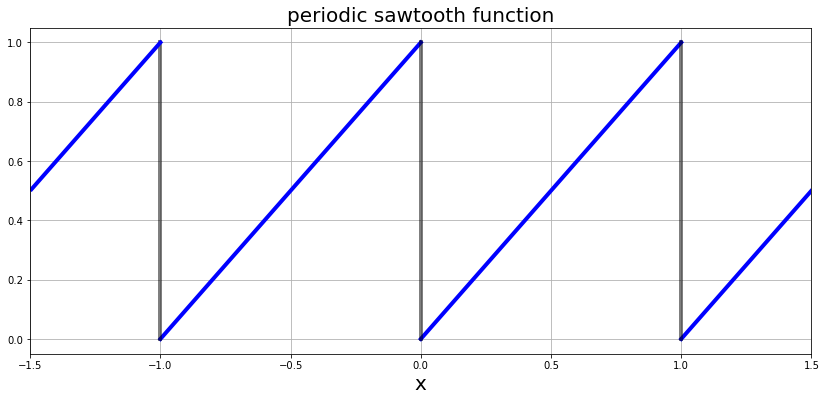

In [3]:
periodic_sawtooth()

**Harmonics**

The harmonics of the Fourier series are the $\cos(2 \pi n x/L)$ and $\sin(2 \pi n x/L)$. These harmonics are defined by the integer value of $n$. The first 3 sine harmonics are $\sin(2 \pi x/L), ~ \sin(4 \pi x/L)~, \sin(6 \pi x/L)$. The $n=1$ harmonics represent one full oscillation of a cosine or sine term that can fit between $0$ and $L$. Much like in the case of waves we can define the wave number $k_n= 2 \pi n/L$, so that the harmonics can be written as $\cos(k_n x)$ and $\sin(k_n x)$. 

**experiment 2:** *Below is an interacvie widget that plots sine harmonics. Write down your observations. What is the relationship between the nodes and anti-nodes and the harmonic number? (The toggle for grid points adjust the number of data points plot, if you make it smaller, the curve becomes jagged. I should just take it off, but I am running out of time to make this lesson.)*

In [4]:
sin_harmonic_interactive();

interactive(children=(IntSlider(value=3, description='harmonic:', max=20), IntSlider(value=500, description='g…

**discussion problem 1**

For the three harmonics [A, B, C] plotted below, what are the $n$-values? Do you have any method to determine to determine the n-values?  

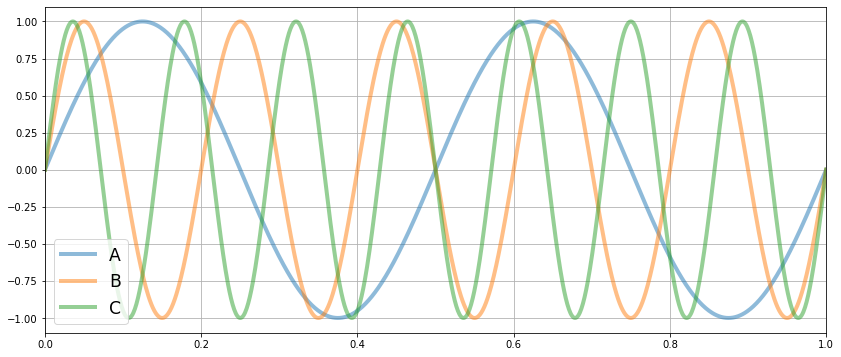

In [44]:
mystery_harmonics()

## How to determine the Fourier coefficients
<span style="color:green">Take note, the following contains math that on frist glance looks intimidating. If you go slow and pay attention to details, you will see it is not all that difficult. Pay attention to the details I point, that will help. If you pay attention to the details you will find it not so difficult and then you will also say to yourself, "you know phyiscs trains me to pay attention to details and go slow. thank you physics, I am wiser all around now." Another reason it looks scarier than it is, is because I write out all the steps - just more equations than is usually necessary.</span>

### Some integral formulas
Before we move on, it will be useful to prove some integral relationships. We start by integrating the product of a nth sine and mth cosine harmonic over the interval $ 0 \leq x \leq L$. <span style="color:green"> Let us calls this our 1st integral formula.</span>
\begin{align}
\begin{split}
& \int_0^L \sin \left(\frac{ 2 \pi n x}{L} \right) \cos \left(\frac{ 2 \pi m x}{L} \right) dx \\
& = \frac{1}{2} \int_0^L \sin \left( (m+n)\frac{ 2 \pi  x}{L}\right) +  \sin \left( (m-n)\frac{ 2 \pi  x}{L}\right) dx \\
& =0
\end{split} 
\end{align} 

**problem 3:** *Write down the trig. identity that was used to move from the first line to the second line above (you may have to look at a table of trig identities, here is the [trig identity table](http://www.sosmath.com/trig/Trig5/trig5/trig5.html) I have been using since I was in your shoes, a time span longer than the age of some of you!). Show that the integral for all m and n valeus.*

Now we examine integrating the product of a nth cosine and mth cosine harmonic over the interval $ 0 \leq x \leq L$. <span style="color:green"> Let us calls this our 2nd integral formula.</span>
\begin{align}
\int_0^L \cos \left(\frac{ 2 \pi n x}{L} \right) \cos \left(\frac{ 2 \pi m x}{L} \right) dx =\begin{cases} 0 & \quad \text{for } n \neq m \\
\frac{L}{2} & \quad \text{for } n = m \end{cases} ~. 
\end{align} 

**problem 4:** *Use the trig. identity 
\begin{align} 
\cos \left(\frac{ 2 \pi n x}{L} \right) \cos \left(\frac{ 2 \pi m x}{L} \right) = \frac{1}{2} \left[ \cos \left( (m+n)\frac{ 2 \pi  x}{L}\right) +  \cos \left( (m-n)\frac{ 2 \pi  x}{L}\right) \right] ~, 
\end{align} 
to prove the $n \neq m$ case in the above integral. Use a half angle formula to prove the $n=m$ case.*

Now we examine integrating the product of a nth sine and mth sine harmonic over the interval $ 0 \leq x \leq L$. <span style="color:green"> Let us calls this our 3rd integral formula.</span>
\begin{align}
\int_0^L \sin \left(\frac{ 2 \pi n x}{L} \right) \sin \left(\frac{ 2 \pi m x}{L} \right) dx =\begin{cases} 0 & \quad \text{for } n \neq m \\
\frac{L}{2} & \quad \text{for } n = m \end{cases} ~. 
\end{align} 

**problem 5:** *Use the trig. identity 
\begin{align} 
\sin \left(\frac{ 2 \pi n x}{L} \right) sin \left(\frac{ 2 \pi m x}{L} \right) =\frac{1}{2}\left[ \cos \left( (m-n)\frac{ 2 \pi  x}{L}\right) -  \cos \left( (m+n)\frac{ 2 \pi  x}{L}\right) \right]~, 
\end{align} 
to prove the $n \neq m$ case in the above integral. Use a half angle formula to prove the $n=m$ case.*

### the Kronecker delta 
Notice that the second and thrid integral formulas are the same. They both are zero when $m \neq n$ and $L/2$ when $m=n$. <span style="color:green"> Be sure you understand that the m and n are indexing harmonics, they take on integers values 1, 2, 3, ... .</span> As a short hand for the two cases we introduce the Kronecker delta $\delta_{nm}$ defined as follows
\begin{align} 
\delta_{mn}= \begin{cases} 0 & \quad \text{for } n \neq m \\
1 & \quad \text{for } n = m \end{cases} ~.
\end{align} 
For example $\delta_{1,1}=1, ~ \delta_{3,3}=1, ~ \delta_{1,2}=0, ~ \delta_{501,1003}=0$. The Kronecker delta is nothing but a shorthand for the cases of $m=n$ and $m \neq n$, don't let it intimidate you (stand back Kronecker, stand back!). 

**problem 6:** *What are the values for the following $\delta_{5,5}, ~ \delta_{5,10}, ~ \delta_{6,12},~ \delta_{1000,1000}$?* 

The Kronecker delta enables us to write integral formulas 2 & 3 more compactly, 


\begin{align}
\int_0^L \cos \left(\frac{ 2 \pi n x}{L} \right) \cos \left(\frac{ 2 \pi m x}{L} \right) dx = \frac{L}{2}\delta_{nm} ~, 
\end{align}

\begin{align}
\int_0^L \sin \left(\frac{ 2 \pi n x}{L} \right) \sin \left(\frac{ 2 \pi m x}{L} \right) dx = \frac{L}{2}\delta_{nm} ~.
\end{align}

**problem 7:** *Using itegral formulas 1 through 3 what are the values of the following integrals?* 

\begin{align}
\int_0^L \sin \left(\frac{ 6 \pi  x}{L} \right) \cos \left(\frac{ 2 \pi  x}{L} \right) dx = ? ~, 
\end{align}

\begin{align}
\int_0^L \sin \left(\frac{ 8 \pi  x}{L} \right) \sin \left(\frac{ 8 \pi  x}{L} \right) dx = ? ~, 
\end{align}

\begin{align}
\int_0^L \cos \left(\frac{ 8 \pi  x}{L} \right) \cos \left(\frac{ 100 \pi  x}{L} \right) dx = ? ~, 
\end{align}

### Calculating the coefficients $a_n$ and $b_n$ 

Let's take our Fourier series representation
\begin{align} 
f(x) = a_0 + \displaystyle \sum_{n=1}^\infty a_n \cos \left( \frac{2 \pi n x}{L} \right) + b_n \sin \left( \frac{2 \pi n x}{L}\right)  ~, 
\end{align} 
and multiple it on the left and right by $\sin(2 \pi m x/L)$ and then integrate from $0$ to $L$ <span style="color:green"> Take note that we are not necessarily multiplying by the same harmonic, we have two harmonic indexes here m and n.</span>

\begin{align} 
\begin{split} 
& \sin \left( \frac{2 \pi m x}{L} \right) f(x) = \sin \left( \frac{2 \pi m x}{L} \right) \left[ a_0 + \displaystyle \sum_{n=1}^\infty a_n \cos \left( \frac{2 \pi n x}{L} \right) + b_n \sin \left( \frac{2 \pi n x}{L}\right)\right] \quad \text{multiply by sine harmonic on both sides}\\
&  \int_0^L \sin \left( \frac{2 \pi m x}{L} \right) f(x) dx= \int_0^L \sin \left( \frac{2 \pi m x}{L} \right) \left[ a_0 + \displaystyle \sum_{n=1}^\infty a_n \cos \left( \frac{2 \pi n x}{L} \right) + b_n \sin \left( \frac{2 \pi n x}{L}\right)\right] dx\quad \text{integrate both sides}~. 
\end{split} 
\end{align} 

**problem 8:** *The right hand side has three terms. Show that the first term is zero by integrating the sine function from $0$ to $L$. Use integral formula 1 to show that the second term is zero* 

After you have done problem 8 you should have the following
\begin{align} 
\begin{split} 
\int_0^L \sin \left( \frac{2 \pi m x}{L} \right) f(x) dx & =\displaystyle \sum_{n=1}^\infty b_n \int_0^L \sin \left( \frac{2 \pi m x}{L} \right) \sin \left( \frac{2 \pi n x}{L}\right) dx \\
& = \displaystyle \sum_{n=1}^\infty b_n \frac{L}{2} \delta_{mn} \quad \text{from 3rd integral formula}  \\
& = \frac{L}{2} \left[ b_1 \delta_{1,m} + b_2 \delta_{2,m} + b_3 \delta_{3, m} + ... \right] \quad \text{the Kronecker delta is going to ensure that only one of these terms is non-zero, the $m=n$ case}~.
\end{split} 
\end{align} 
As stated in the last line above, the Kronecker delta is zero for all cases except when $m=n$. Therefor the infinite sum collapses to one single value. <span style="color:green"> Go slow and be sure you follow all the arguments here - go slow.</span>

This shows that 
\begin{align} 
b_n= \frac{2}{L} \int_0^L \sin \left( \frac{2 \pi n x}{L} \right) f(x) dx ~. 
\end{align} 

Now we follow a similar path to get the $a_n$. 

**problem 9:** *Multiply $ f(x) = a_0 +  \sum_n a_n \cos \left( 2 \pi n x/L \right) + b_n \sin \left( 2 \pi n x/L\right) $ on the left and right by $\cos(2 \pi m x/L)$, integrate from $0$ to $L$ to show that for $n \geq 1$ that (you will need to utilize integral formula 3)*
\begin{align} 
a_n =  \frac{2}{L} \int_0^L \cos \left( \frac{2 \pi n x}{L} \right) f(x) dx ~.
\end{align} 

All the coefficients are determined except the $a_0$ term. To get this we integrate $f(x) = a_0 +  \sum_n a_n \cos \left( 2 \pi n x/L \right) + b_n \sin \left( 2 \pi n x/L\right)$ on both sides from from $0$ to $L$. This is also equivalent to multiply the left and right by the 0 cosine harmonic (which is just 1) and then integrating. 
\begin{align} 
\begin{split} 
\int_0^L f(x) dx & = \int_0^L \left[ a_0 +  \sum_n a_n \cos \left( \frac{2 \pi n x}{L} \right) + b_n \sin \left( \frac{2 \pi n x}{L}\right)\right] dx \\
& = L a_0 ~, 
\end{split} 
\end{align} 
or 
\begin{align} 
a_0 = \frac{1}{L} \int_0^L f(x) dx ~. 
\end{align} 

**problem 10:** *Show that the above derivation is true.*

The coefficient $a_0$ is the average of the function over the interval $0$ to $L$. To see this let us write our integral in descrete form (a [Reimann integral](https://mathworld.wolfram.com/RiemannIntegral.html) ). We imagine breaking the interval $0$ to $L$ into $N$ steps of length $\Delta x = L/N$. We evaluate the function $f(x)$ at the sampling points $x_i^*$ (usually the midpoint, left, or right end of the interval $\Delta x$). So the integral is 
\begin{align} 
\lim_{N\to \infty} \frac{1}{L} \displaystyle \sum_{i=1}^N f(x^*_i) \Delta x = \frac{1}{L} \int_0^L f(x) dx ~. 
\end{align} 

Substituting $\Delta x = L/N$ into the left hand side gives 
\begin{align} 
 \frac{1}{L} \displaystyle \sum_{i=1}^N f(x^*_i) \Delta x =  \frac{1}{N} \displaystyle \sum_{i=1}^N f(x^*_i) = \text{the sum of the function evalauted at the sampling points divided by the total number}~.
\end{align}

The above shows that indeed $a_0$ is the average value of the funtion over the interval $0$ to $L$. We now can write down all our relations for the coefficients and state our program for Fourier series. **This program is worth noting, as you will use it latter in this assignment.**

### The Fourier Series program

The Fourier series representation of a function $f(x)$ that is periodic on the interval $0 \leq x \leq L$ is

\begin{align} 
f(x) = a_0 + \displaystyle \sum_{n=1}^\infty a_n \cos \left( \frac{2 \pi n x}{L} \right) + b_n \sin \left( \frac{2 \pi n x}{L}\right)  ~, 
\end{align} 
where the coefficients $a_n$ and $b_n$ are determined by 

\begin{align} 
a_0 = \frac{1}{L} \int_0^L f(x) dx ~, 
\end{align} 

\begin{align} 
a_n =  \frac{2}{L} \int_0^L \cos \left( \frac{2 \pi n x}{L} \right) f(x) dx ~,
\end{align}

\begin{align} 
b_n =  \frac{2}{L} \int_0^L \sin \left( \frac{2 \pi n x}{L} \right) f(x) dx ~.
\end{align}

I will repeat the above statements as it is worth ingraining this idea into our heads. If we have a periodic function, we write/represent that function as a summed series of sines and cosine, where each sine and cosine has a different a frequency indexed by the $n$. The weight of each sine and cosine term is determined by the integral formulas for $a_0, ~ a_n, ~b_n$ above. In fact the program is incredibly simple. The integrals for $a_0, ~ a_n, ~b_n$ may be tricky, but that is something we can usually overcome either with a bit of coffee or some help from some mathematical software. In contrast, we have seen in our physics class, that a physical problem can be very difficult even if the math is simple. 

## even and odd functions
A function is even if $f(-x)=f(x)$. A function is odd if $f(-x)=-f(x)$. Cosine is an even function. Sine is an odd function. The graph of an even function is always symmetric about the vertical axis. 

**problem 11:** *Plot cosine and sine from -$\pi$ to $\pi$. Observe that cosine is even (symmetric about vertical axis) and sine is odd.* 

If a function is odd then it's Fourier series will only consist of sine harmonics, since sine is odd. If a function is even then it's Fourier series will only consists of cosine harmonics, since cosine is even. 

## The sawtooth function
We want to find the Fourier series for the sawtooth function defined as $f(x)=Ax$ for $-L/2 \leq x \leq L/2$. A plot is shown below. This function is odd. Hence the Fourier seris will consist of only sine terms $f(x) = \sum_n b_n \sin(k_n x) $. We apply the program outlined above to determine the Fourier coefficients $b_n$. (If you need help with the integral you can use [Wolfram](https://www.wolframalpha.com/input/?i=x+sin%28kx%29).) 
\begin{align}
\begin{split} 
b_n & = \frac{2}{L} \int_{-L/2}^{L/2} \sin \left( \frac{2 \pi n x}{L} \right) f(x) dx \\
& \frac{2}{L} \int_{-L/2}^{L/2} A x \sin(k_n x) dx \quad \text{inserted $f(x)=Ax$} \\
& = \frac{2A}{L} \left[ \frac{\sin(k_n x) - k_n x \cos(k_nx)}{k^2_n} \right] \Big|_{-L/2}^{L/2} \quad \text{used integration by parts} \\
& = (-1)^{n+1}  \frac{AL}{\pi n} 
\end{split} 
\end{align} 

**problem 12:** *Show the math moving from the second to last line to the last line in the above. You will need to recall what $k_n$ is and understand the values of cosine and sine when the arguments are multiples of $\pi$.*

Having determined the values for $b_n$ we can write out the Fourier series representation for $f(x) = Ax$
\begin{align} 
\frac{A}{\pi} \sin\left( \frac{2\pi}{L} x \right) - \frac{A}{\pi n} \sin\left( \frac{4\pi}{L} x \right) + \frac{A}{3\pi} \sin\left( \frac{6\pi}{L} x \right) - ...~. 
\end{align} 

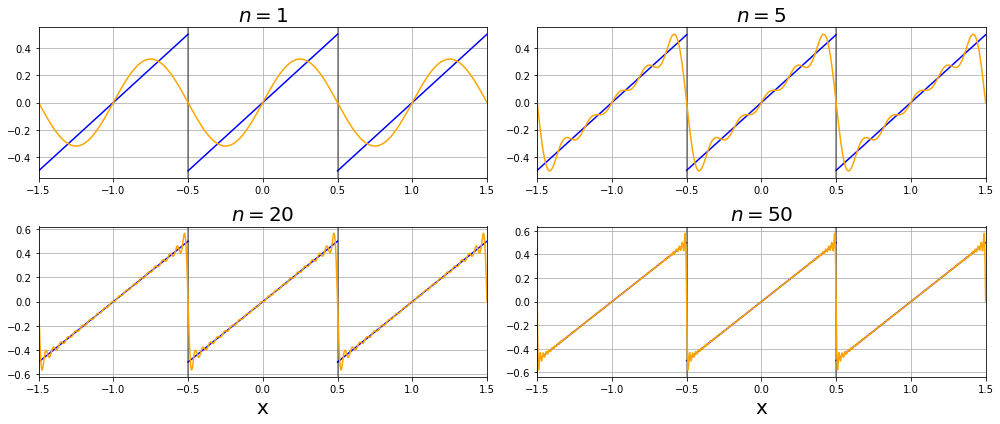

In [46]:
sawtooth_static_plot()